#**Mostafa Walid Mostafa Radwan - A20000908**

In [ ]:
import pandas as pd

# Load the User-Item Matrix from a CSV file
user_item_matrix = pd.read_csv('user_item_ratings.csv')

# Strip any whitespace from the column names
user_item_matrix.columns = user_item_matrix.columns.str.strip()

# Get the number of users (tnu) and items (tni)
tnu = user_item_matrix.shape[1] - 1  # Exclude the first column (user IDs)
tni = user_item_matrix.shape[0]

print("Number of Users (tnu):", tnu)
print("Number of Items (tni):", tni)

# Define the active users
active_users = ["User1", "User2", "User3"]

# Initialize result storage
results = []

for active_user in active_users:
    if active_user not in user_item_matrix.columns:
        print(f"Warning: {active_user} not found in the matrix columns.")
        continue

    # Get the items rated by the active user
    active_user_rated = user_item_matrix[active_user].notna()
    co_rated_users = 0
    co_rated_items = 0

    for other_user in user_item_matrix.columns:
        if active_user == other_user:
            continue

        # Get the items rated by the other user
        other_user_rated = user_item_matrix[other_user].notna()

        # Find common rated items
        common_rated_items = active_user_rated & other_user_rated
        common_count = common_rated_items.sum()

        if common_count > 0:
            co_rated_users += 1
            co_rated_items += common_count

    results.append({
        'Active_User': active_user,
        'No_common_users': co_rated_users,
        'No_coRated_items': co_rated_items
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nResults:")
print(results_df)

Number of Users (tnu): 50
Number of Items (tni): 30

Results:
  Active_User  No_common_users  No_coRated_items
0       User1               50              1128
1       User2               50              1205
2       User3               50              1259


In [ ]:
import pandas as pd
import numpy as np

# Load the User-Item Matrix from a CSV file
user_item_matrix = pd.read_csv('user_item_ratings.csv')

# Define the active users
active_users = ['User1', 'User2', 'User3']

# Strip any whitespace from the column names
user_item_matrix.columns = user_item_matrix.columns.str.strip()
active_users = [user.strip() for user in active_users]

# Initialize result storage
results = []

for active_user in active_users:
    if active_user not in user_item_matrix.columns:
        print(f"Warning: {active_user} not found in the matrix columns.")
        continue

    # Get the items rated by the active user
    active_user_rated = user_item_matrix[active_user].notna()
    co_rated_users = 0
    co_rated_items = 0

    for other_user in user_item_matrix.columns:
        if active_user == other_user:
            continue

        # Get the items rated by the other user
        other_user_rated = user_item_matrix[other_user].notna()

        # Find common rated items
        common_rated_items = active_user_rated & other_user_rated
        common_count = common_rated_items.sum()

        if common_count > 0:
            co_rated_users += 1
            co_rated_items += common_count

    results.append({
        'Active_User': active_user,
        'No_common_users': co_rated_users,
        'No_coRated_items': co_rated_items
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by "No_common_users" in descending order
sorted_results = results_df.sort_values(by='No_common_users', ascending=False)

# Create a 2-D array
result_array = sorted_results[['No_common_users', 'No_coRated_items']].to_numpy()

# Display the 2-D array
print("2-D Array:")
print(result_array)

2-D Array:
[[  50 1128]
 [  50 1205]
 [  50 1259]]


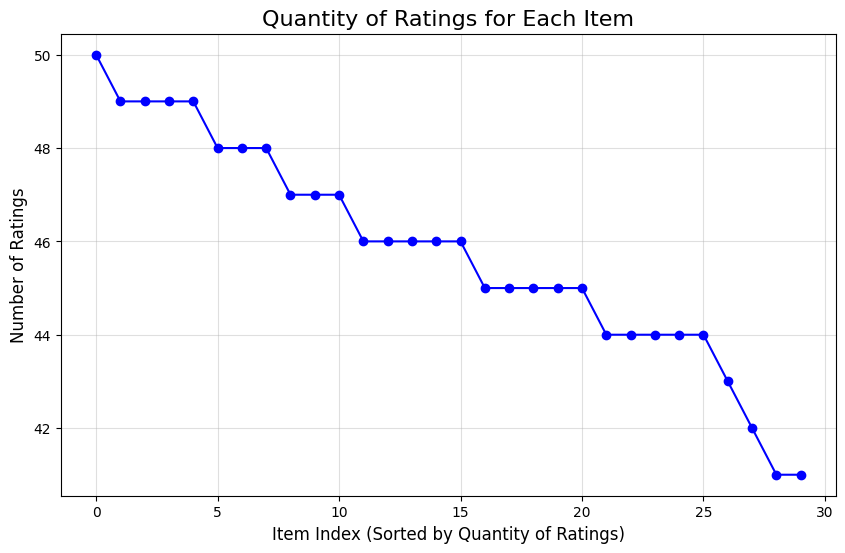

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the User-Item Matrix from a CSV file
user_item_matrix = pd.read_csv('user_item_ratings.csv')

# Count the number of ratings for each item (row-wise count of non-NA values)
item_rating_counts = user_item_matrix.notna().sum(axis=1)

# Sort the counts in descending order
sorted_counts = item_rating_counts.sort_values(ascending=False)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(sorted_counts.values, marker='o', linestyle='-', color='b')
plt.title('Quantity of Ratings for Each Item', fontsize=16)
plt.xlabel('Item Index (Sorted by Quantity of Ratings)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

In [ ]:
import pandas as pd

# Load the User-Item Matrix from a CSV file
user_item_matrix = pd.read_csv('user_item_ratings.csv', index_col=0)

# Define active users (replace with actual user identifiers in your dataset)
active_users = ['User1', 'User2', 'User3']

# Get the total number of items
total_items = user_item_matrix.shape[0]

# Dictionary to store thresholds for each active user
thresholds = {}

for active_user in active_users:
    # Get the items rated by the active user
    active_user_rated = user_item_matrix[active_user].notna()

    # Count the number of items rated by the active user
    num_items_rated_by_active_user = active_user_rated.sum()

    # Set the 30% co-rating threshold
    min_co_rated_items = int(0.3 * num_items_rated_by_active_user)

    # Initialize counter for users who co-rated at least 30% of the items
    max_common_users = 0

    # Iterate through all other users to check co-rating
    for user in user_item_matrix.columns:
        if user == active_user:
            continue

        # Get items rated by the current user
        user_rated = user_item_matrix[user].notna()

        # Find the number of common items rated by both users
        co_rated_items = (active_user_rated & user_rated).sum()

        # Check if this user meets the 30% threshold
        if co_rated_items >= min_co_rated_items:
            max_common_users += 1

    # Store the result for the active user
    thresholds[active_user] = max_common_users

# Display the thresholds
for user, threshold in thresholds.items():
    print(f"Threshold for {user}: {threshold}")

Threshold for User1: 49
Threshold for User2: 49
Threshold for User3: 49


In [ ]:
import pandas as pd

def count_common_users_and_co_rated_items(user_ratings, active_user, threshold=0.3):

    if active_user not in user_ratings.columns:
        return f"Warning: {active_user} not found in the matrix columns."

    # Get the items rated by the active user
    active_user_rated = user_ratings[active_user].notna()

    no_common_users = 0
    no_co_rated_items = 0

    for other_user in user_ratings.columns:
        if active_user != other_user:
            other_user_rated = user_ratings[other_user].notna()
            common_rated_items = active_user_rated & other_user_rated
            common_count = common_rated_items.sum()

            total_ratings_active_user = active_user_rated.sum()
            percentage_co_rated = common_count / total_ratings_active_user

            if percentage_co_rated >= threshold:
                no_common_users += 1
                no_co_rated_items += common_count

    return {
        'Active_User': active_user,
        'No_common_users': no_common_users,
        'No_coRated_items': no_co_rated_items
    }

# Assuming your data is in a CSV file with columns as users
user_ratings = pd.read_csv('user_item_ratings.csv', index_col=0)

active_users = ['User1', 'User2', 'User3']

for active_user in active_users:
    result = count_common_users_and_co_rated_items(user_ratings, active_user, threshold=0.3)
    if isinstance(result, str):  # Check if result is a warning message
        print(result)
    else:
        print(f"\nFor Active User: {result['Active_User']}")
        print(f"No_common_users (with at least 30% co-rated items): {result['No_common_users']}")
        print(f"No_coRated_items (with at least 30% co-rated users): {result['No_coRated_items']}")


For Active User: User1
No_common_users (with at least 30% co-rated items): 49
No_coRated_items (with at least 30% co-rated users): 1103

For Active User: User2
No_common_users (with at least 30% co-rated items): 49
No_coRated_items (with at least 30% co-rated users): 1178

For Active User: User3
No_common_users (with at least 30% co-rated items): 49
No_coRated_items (with at least 30% co-rated users): 1231


#**Part 1**
**Case Study 1.1**

User-based Collaborative Filtering algorithms using Cosine Similarity without considering the bias adjustment effect of mean-centering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users
def get_top_n_percent(similarity_row, n=20):
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

# Function to predict ratings
def predict_rating(active_user, similarity_matrix, user_item_matrix, use_discount_factor=False):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=20)

    if use_discount_factor:
        # Apply discount factor
        max_similarity = top_users.max()
        discount_factor = 1 - (top_users / max_similarity)
        discounted_similarity = top_users * (1 - discount_factor)
    else:
        discounted_similarity = top_users

    # Predict ratings
    predicted_ratings = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        numerator = (user_item_matrix[item] * discounted_similarity).sum()
        denominator = discounted_similarity.abs().sum()

        predicted_ratings[item] = numerator / denominator if denominator != 0 else 0

    return predicted_ratings

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Step 1.1.3: Prediction without Discount Factor
    predictions_no_df = predict_rating(
        active_user, similarity_matrix, user_item_matrix, use_discount_factor=False
    )
    print("Predictions without Discount Factor:", predictions_no_df)

    # Step 1.1.6: Prediction with Discount Factor
    predictions_with_df = predict_rating(
        active_user, similarity_matrix, user_item_matrix, use_discount_factor=True
    )
    print("Predictions with Discount Factor:", predictions_with_df)


Analysis for User1:

Predictions without Discount Factor: {'Come the Morning': 2.534482131719024, 'The Perfect Shadow': 2.5114620827470824, "Maybe It's True What They Say About Us": 1.8509512700093147, 'The Problem with People': 2.3552674525712014, 'Amityville: Where the Echo Lives': 2.0550285545440676}
Predictions with Discount Factor: {'Come the Morning': 2.4555325840648674, 'The Perfect Shadow': 2.4111508036425175, "Maybe It's True What They Say About Us": 1.7923522193038968, 'The Problem with People': 2.2969731319363573, 'Amityville: Where the Echo Lives': 1.9988659764297974}

Analysis for User2:

Predictions without Discount Factor: {'I giganti del cielo': 2.047197222509709, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 2.166088000898524, 'Power Alley': 2.8397333074613496}
Predictions with Discount Factor: {'I giganti del cielo': 1.9878300703155134, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 2.1246575704310477, 'Power Alley': 2.7697924185550367}

Analysis for User3:

Predictions wit

Determine the top 20% closest users to each active user.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user}:\n")

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top 20% closest users
    top_20_percent_users = get_top_n_percent(similarity_row, n=20)

    print(top_20_percent_users)


Top 20% Closest Users for User1:

User1     1.000000
User16    0.811344
User5     0.805661
User25    0.796926
User4     0.793058
User34    0.790270
User49    0.789581
User38    0.773793
User46    0.764264
User17    0.764253
Name: User1, dtype: float64

Top 20% Closest Users for User2:

User2     1.000000
User28    0.886142
User38    0.840459
User45    0.830957
User25    0.821160
User19    0.817527
User39    0.815440
User21    0.799950
User12    0.799177
User23    0.791842
Name: User2, dtype: float64

Top 20% Closest Users for User3:

User3     1.000000
User29    0.861920
User17    0.844031
User23    0.830241
User22    0.829816
User35    0.828374
User12    0.828334
User14    0.828183
User25    0.826934
User6     0.825333
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to predict ratings for unrated items
def predict_rating(active_user, similarity_matrix, user_item_matrix, use_discount_factor=False):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=20)

    # Predict ratings for unrated items
    predicted_ratings = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Get ratings of top N% closest users for this item
        top_user_ratings = user_item_matrix[item].loc[top_users.index]

        # Calculate weighted average of ratings, using similarity as weights
        numerator = (top_user_ratings * top_users).sum()
        denominator = top_users.sum()

        # Predict the rating for the active user and item
        predicted_rating = numerator / denominator if denominator != 0 else 0
        predicted_ratings[item] = predicted_rating

    return predicted_ratings

# Function to classify as "like" or "dislike"
def classify_likes_dislikes(predicted_ratings, threshold=3):
    """
    Classify the predicted ratings as 'like' or 'dislike' based on a threshold.
    """
    classified_predictions = {}
    for item, rating in predicted_ratings.items():
        classification = 'like' if rating > threshold else 'dislike'
        classified_predictions[item] = classification
    return classified_predictions

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Step 1.1.3: Prediction without Discount Factor
    predictions_no_df = predict_rating(
        active_user, similarity_matrix, user_item_matrix, use_discount_factor=False
    )
    print("Predictions without Discount Factor:", predictions_no_df)

    # Step 1.1.6: Classify predictions as 'like' or 'dislike'
    classified_predictions_no_df = classify_likes_dislikes(predictions_no_df)
    print("Classified Predictions without Discount Factor:", classified_predictions_no_df)

    # Step 1.1.6: Prediction with Discount Factor (if you choose to apply discounting)
    predictions_with_df = predict_rating(
        active_user, similarity_matrix, user_item_matrix, use_discount_factor=True
    )
    print("Predictions with Discount Factor:", predictions_with_df)

    # Step 1.1.6: Classify predictions with 'like' or 'dislike'
    classified_predictions_with_df = classify_likes_dislikes(predictions_with_df)
    print("Classified Predictions with Discount Factor:", classified_predictions_with_df)


Analysis for User1:

Predictions without Discount Factor: {'Come the Morning': 2.5344821317190243, 'The Perfect Shadow': 2.5114620827470824, "Maybe It's True What They Say About Us": 1.8509512700093147, 'The Problem with People': 2.3552674525712014, 'Amityville: Where the Echo Lives': 2.0550285545440676}
Classified Predictions without Discount Factor: {'Come the Morning': 'dislike', 'The Perfect Shadow': 'dislike', "Maybe It's True What They Say About Us": 'dislike', 'The Problem with People': 'dislike', 'Amityville: Where the Echo Lives': 'dislike'}
Predictions with Discount Factor: {'Come the Morning': 2.5344821317190243, 'The Perfect Shadow': 2.5114620827470824, "Maybe It's True What They Say About Us": 1.8509512700093147, 'The Problem with People': 2.3552674525712014, 'Amityville: Where the Echo Lives': 2.0550285545440676}
Classified Predictions with Discount Factor: {'Come the Morning': 'dislike', 'The Perfect Shadow': 'dislike', "Maybe It's True What They Say About Us": 'dislike

Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to compute discount factor and discounted similarity
def compute_discounted_similarity(active_user, similarity_matrix, n=20, threshold=3):
    """
    Compute discount factor (DF) and discounted similarity (DS) for each active user.
    """
    # Get top N% closest users
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)

    # Compute the discount factor and discounted similarity for each user
    max_similarity = top_users.max()  # Max similarity score among top N% closest users
    discount_factors = {}
    discounted_similarities = {}

    for user, similarity in top_users.items():
        # Calculate discount factor (DF)
        DF = 1 - (similarity / max_similarity)

        # Calculate discounted similarity (DS)
        DS = similarity * (1 - DF)

        # Store the results
        discount_factors[user] = DF
        discounted_similarities[user] = DS

    return discount_factors, discounted_similarities

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Compute discount factor and discounted similarity for each user
    discount_factors, discounted_similarities = compute_discounted_similarity(
        active_user, similarity_matrix, n=20, threshold=3
    )

    # Output the results
    print("Discount Factor (DF):", discount_factors)
    print("Discounted Similarity (DS):", discounted_similarities)


Analysis for User1:

Discount Factor (DF): {'User1': 0.0, 'User16': 0.18865605447444544, 'User5': 0.1943390510551144, 'User25': 0.20307420307380464, 'User4': 0.20694201873034024, 'User34': 0.2097298678803371, 'User49': 0.21041907915637204, 'User38': 0.22620742320963805, 'User46': 0.23573632183086213, 'User17': 0.23574709942726157}
Discounted Similarity (DS): {'User1': 1.0000000000000002, 'User16': 0.6582789979409742, 'User5': 0.6490895646547737, 'User25': 0.6350907258064518, 'User4': 0.6289409616555082, 'User34': 0.6245268817204296, 'User49': 0.6234380305602717, 'User38': 0.5987549518958684, 'User46': 0.5840989697686197, 'User17': 0.5840824960338442}

Analysis for User2:

Discount Factor (DF): {'User2': 0.0, 'User28': 0.11385774483235056, 'User38': 0.15954108301729952, 'User45': 0.16904345736894155, 'User25': 0.1788402070408247, 'User19': 0.1824731568734851, 'User39': 0.18455954597335855, 'User21': 0.20005040759052406, 'User12': 0.20082290035617067, 'User23': 0.20815775373009726}
Disc

Determine the top 20% closest users using Discounted Similarity

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users based on discounted similarity
def get_top_n_percent_by_ds(similarity_matrix, active_user, n=20):
    """
    Given a similarity matrix and an active user, return the top N% closest users based on discounted similarity.
    """
    # Compute discount factor and discounted similarity
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=100)  # Get the top 100 users first

    max_similarity = top_users.max()  # Max similarity score among top N% closest users
    discount_factors = {}
    discounted_similarities = {}

    for user, similarity in top_users.items():
        # Calculate discount factor (DF)
        DF = 1 - (similarity / max_similarity)

        # Calculate discounted similarity (DS)
        DS = similarity * (1 - DF)

        # Store the results
        discounted_similarities[user] = DS

    # Sort the users based on discounted similarity
    sorted_users_by_ds = pd.Series(discounted_similarities).sort_values(ascending=False)

    # Select the top N% closest users
    top_n_cutoff = int(len(sorted_users_by_ds) * n / 100)
    return sorted_users_by_ds.iloc[:top_n_cutoff]  # Return top N% closest users based on discounted similarity

# Function to compute discount factor and discounted similarity
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    """
    Compute discount factor (DF) and discounted similarity (DS) for each active user.
    """
    # Get the top N% closest users based on discounted similarity
    top_users_by_ds = get_top_n_percent_by_ds(similarity_matrix, active_user, n=n)
    return top_users_by_ds

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Compute the top 20% closest users based on discounted similarity
    top_20_percent_users = compute_discounted_similarity(
        active_user, similarity_matrix, n=20
    )

    # Output the results
    print(f"Top 20% closest users to {active_user} based on discounted similarity:")
    print(top_20_percent_users)


Analysis for User1:

Top 20% closest users to User1 based on discounted similarity:
User1     1.000000
User16    0.658279
User5     0.649090
User25    0.635091
User4     0.628941
User34    0.624527
User49    0.623438
User38    0.598755
User46    0.584099
User17    0.584082
dtype: float64

Analysis for User2:

Top 20% closest users to User2 based on discounted similarity:
User2     1.000000
User28    0.785248
User38    0.706371
User45    0.690489
User25    0.674303
User19    0.668350
User39    0.664943
User21    0.639919
User12    0.638684
User23    0.627014
dtype: float64

Analysis for User3:

Top 20% closest users to User3 based on discounted similarity:
User3     1.000000
User29    0.742905
User17    0.712389
User23    0.689301
User22    0.688595
User35    0.686204
User12    0.686138
User14    0.685888
User25    0.683820
User6     0.681175
dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Fill NaN with 0 for cosine similarity calculations
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_filled),
    index=user_item_filled.index,
    columns=user_item_filled.index
)

# Function to find top N% closest users based on discounted similarity
def get_top_n_percent_by_ds(similarity_matrix, active_user, n=20):
    """
    Given a similarity matrix and an active user, return the top N% closest users based on discounted similarity.
    """
    # Compute discount factor and discounted similarity
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=100)  # Get the top 100 users first

    max_similarity = top_users.max()  # Max similarity score among top N% closest users
    discount_factors = {}
    discounted_similarities = {}

    for user, similarity in top_users.items():
        # Calculate discount factor (DF)
        DF = 1 - (similarity / max_similarity)

        # Calculate discounted similarity (DS)
        DS = similarity * (1 - DF)

        # Store the results
        discounted_similarities[user] = DS

    # Sort the users based on discounted similarity
    sorted_users_by_ds = pd.Series(discounted_similarities).sort_values(ascending=False)

    # Select the top N% closest users
    top_n_cutoff = int(len(sorted_users_by_ds) * n / 100)
    return sorted_users_by_ds.iloc[:top_n_cutoff]  # Return top N% closest users based on discounted similarity

# Function to predict ratings for unrated items
def predict_rating_for_unrated_items(active_user, similarity_matrix, user_item_matrix, n=20, threshold=3):
    """
    Predict ratings for unrated items for each active user based on the top N% similar users.
    If the predicted rating is above a certain threshold, the user will like the item.
    """
    # Get the top N% closest users based on discounted similarity
    top_users_by_ds = get_top_n_percent_by_ds(similarity_matrix, active_user, n=n)

    predicted_ratings = {}

    # Iterate over all items to predict the rating for unrated items
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):  # Skip if the item is already rated
            continue

        # Compute predicted rating using weighted average of top N% closest users' ratings
        numerator = 0
        denominator = 0
        for user in top_users_by_ds.index:
            rating = user_item_matrix.loc[user, item]
            if pd.notna(rating):  # Only consider rated items
                numerator += rating * top_users_by_ds[user]  # Weighted sum
                denominator += abs(top_users_by_ds[user])  # Sum of weights

        # Compute the predicted rating
        if denominator != 0:
            predicted_rating = numerator / denominator
        else:
            predicted_rating = 0  # Default to 0 if no ratings are available from the top users

        # Predict whether the user will like or dislike the item
        predicted_ratings[item] = 'Like' if predicted_rating >= threshold else 'Dislike'

    return predicted_ratings

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Predict whether the user will like or dislike unrated items
    predictions = predict_rating_for_unrated_items(
        active_user, similarity_matrix, user_item_matrix, n=20, threshold=3
    )

    # Output the predictions
    print(f"Predictions for {active_user}:")
    print(predictions)


Analysis for User1:

Predictions for User1:
{'Come the Morning': 'Dislike', 'The Perfect Shadow': 'Dislike', "Maybe It's True What They Say About Us": 'Dislike', 'The Problem with People': 'Dislike', 'Amityville: Where the Echo Lives': 'Like'}

Analysis for User2:

Predictions for User2:
{'I giganti del cielo': 'Dislike', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Dislike', 'Power Alley': 'Like'}

Analysis for User3:

Predictions for User3:
{'Nine Ball': 'Dislike', 'Moe': 'Like'}


**Case Study 1.2**

User-based Collaborative Filtering algorithms using Cosine Similarity with mean-centering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Cosine similarity with mean-centering
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users
def get_top_n_percent(similarity_row, n=20):
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

# Function to predict ratings with or without discount factor
def predict_rating(active_user, similarity_matrix, user_item_matrix, mean_ratings, use_discount_factor=False):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=20)

    if use_discount_factor:
        # Apply discount factor
        max_similarity = top_users.max()
        discount_factor = 1 - (top_users / max_similarity)
        discounted_similarity = top_users * (1 - discount_factor)
    else:
        discounted_similarity = top_users

    # Predict ratings
    predicted_ratings = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Weighted average of ratings from top users
        numerator = (
            (user_item_matrix[item] - mean_ratings[top_users.index]).fillna(0) * discounted_similarity
        ).sum()
        denominator = discounted_similarity.abs().sum()

        # Add back the mean rating of the active user for prediction
        predicted_ratings[item] = mean_ratings[active_user] + (numerator / denominator if denominator != 0 else 0)

    return predicted_ratings

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Step 1.2.3: Prediction without Discount Factor
    predictions_no_df = predict_rating(
        active_user, similarity_matrix_mean_centered, user_item_matrix, mean_ratings, use_discount_factor=False
    )
    print("Predictions without Discount Factor:", predictions_no_df)

    # Step 1.2.6: Prediction with Discount Factor
    predictions_with_df = predict_rating(
        active_user, similarity_matrix_mean_centered, user_item_matrix, mean_ratings, use_discount_factor=True
    )
    print("Predictions with Discount Factor:", predictions_with_df)


Analysis for User1:

Predictions without Discount Factor: {'Come the Morning': 3.535023635033543, 'The Perfect Shadow': 2.619884825845544, "Maybe It's True What They Say About Us": 3.455236088430259, 'The Problem with People': 3.5044475538467585, 'Amityville: Where the Echo Lives': 3.7481262291235744}
Predictions with Discount Factor: {'Come the Morning': 3.4361428549285575, 'The Perfect Shadow': 2.856448867534542, "Maybe It's True What They Say About Us": 3.2717991120447114, 'The Problem with People': 3.345622592309169, 'Amityville: Where the Echo Lives': 3.465625008216889}

Analysis for User2:

Predictions without Discount Factor: {'I giganti del cielo': 2.6135442179981028, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 3.1831849226496955, 'Power Alley': 3.250048753889893}
Predictions with Discount Factor: {'I giganti del cielo': 2.73049714000584, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 3.2160589556638026, 'Power Alley': 3.1859344484818406}

Analysis for User3:

Predictions without D

Determine the top 20% closest users to each active user.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Compute cosine similarity between users based on mean-centered ratings
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user} based on mean-centered ratings:\n")

    # Get the similarity row for the active user
    similarity_row = similarity_matrix_mean_centered.loc[active_user]

    # Get the top 20% closest users
    top_20_percent_users = get_top_n_percent(similarity_row, n=20)

    print(top_20_percent_users)


Top 20% Closest Users for User1 based on mean-centered ratings:

User1     1.000000
User34    0.335968
User16    0.279364
User10    0.274481
User9     0.242951
User6     0.242320
User5     0.155236
User29    0.147421
User23    0.140747
User15    0.129336
Name: User1, dtype: float64

Top 20% Closest Users for User2 based on mean-centered ratings:

User2     1.000000
User21    0.456713
User28    0.444823
User38    0.432251
User43    0.389256
User45    0.304393
User25    0.247108
User5     0.241456
User19    0.216982
User39    0.191035
Name: User2, dtype: float64

Top 20% Closest Users for User3 based on mean-centered ratings:

User3     1.000000
User24    0.575759
User12    0.275748
User26    0.267658
User47    0.254834
User35    0.238089
User17    0.222731
User42    0.204389
User22    0.194101
User32    0.123002
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Compute cosine similarity between users based on mean-centered ratings
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to predict ratings for items the active user hasn't rated yet
def predict_rating(active_user, similarity_matrix, user_item_matrix, mean_ratings, n=20):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)

    # Predict ratings for items the active user hasn't rated
    predicted_ratings = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Weighted average of ratings from top users (with cosine similarity as weights)
        numerator = 0
        denominator = 0
        for user in top_users.index:
            if pd.notna(user_item_matrix.loc[user, item]):  # Only consider users who have rated the item
                numerator += user_item_matrix.loc[user, item] * similarity_matrix.loc[active_user, user]
                denominator += abs(similarity_matrix.loc[active_user, user])

        # Avoid division by zero
        predicted_ratings[item] = numerator / denominator if denominator != 0 else mean_ratings[active_user]

    return predicted_ratings

# Function to determine like/dislike based on a threshold (e.g., 3)
def predict_like_dislike(predicted_ratings, threshold=3):
    predictions = {}
    for item, predicted_rating in predicted_ratings.items():
        if predicted_rating >= threshold:
            predictions[item] = "Like"
        else:
            predictions[item] = "Dislike"
    return predictions

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nPrediction for {active_user}:\n")

    # Predict ratings for items the active user hasn't rated yet
    predictions = predict_rating(active_user, similarity_matrix_mean_centered, user_item_matrix, mean_ratings, n=20)
    print("Predicted Ratings:", predictions)

    # Predict whether the active user will like or dislike the items
    like_dislike_predictions = predict_like_dislike(predictions, threshold=3)
    print("Like/Dislike Predictions:", like_dislike_predictions)


Prediction for User1:

Predicted Ratings: {'Come the Morning': 3.545859995614502, 'The Perfect Shadow': 2.1070904603048555, "Maybe It's True What They Say About Us": 3.418624673146063, 'The Problem with People': 3.548795770879103, 'Amityville: Where the Echo Lives': 3.8683679994393705}
Like/Dislike Predictions: {'Come the Morning': 'Like', 'The Perfect Shadow': 'Dislike', "Maybe It's True What They Say About Us": 'Like', 'The Problem with People': 'Like', 'Amityville: Where the Echo Lives': 'Like'}

Prediction for User2:

Predicted Ratings: {'I giganti del cielo': 2.4422895832380136, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 3.2211961212654514, 'Power Alley': 3.28057767922894}
Like/Dislike Predictions: {'I giganti del cielo': 'Dislike', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Like', 'Power Alley': 'Like'}

Prediction for User3:

Predicted Ratings: {'Nine Ball': 4.152478011735186, 'Moe': 3.6696269892575395}
Like/Dislike Predictions: {'Nine Ball': 'Like', 'Moe': 'Like'}


Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Compute cosine similarity between users based on mean-centered ratings
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to compute the Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20, threshold=3):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)

    # Get the maximum similarity score among the top N% closest users
    max_similarity = top_users.max()

    # Compute the Discount Factor (DF) and Discounted Similarity (DS)
    discounted_similarity = {}
    for user, similarity in top_users.items():
        # Calculate the Discount Factor (DF)
        df = 1 - (similarity / max_similarity)

        # Calculate the Discounted Similarity (DS)
        ds = similarity * (1 - df)

        discounted_similarity[user] = ds

    return discounted_similarity

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nDiscounted Similarity for {active_user}:\n")

    # Compute Discounted Similarity (DS) for the active user
    discounted_similarity = compute_discounted_similarity(active_user, similarity_matrix_mean_centered, n=20, threshold=3)

    print("Discounted Similarity (DS):", discounted_similarity)


Discounted Similarity for User1:

Discounted Similarity (DS): {'User1': 0.9999999999999997, 'User34': 0.11287461026571734, 'User16': 0.07804399253364773, 'User10': 0.07533982719718237, 'User9': 0.05902539574725008, 'User6': 0.058719046185170896, 'User5': 0.02409836065573771, 'User29': 0.02173290737130894, 'User23': 0.019809849789682137, 'User15': 0.016727785551767106}

Discounted Similarity for User2:

Discounted Similarity (DS): {'User2': 1.0, 'User21': 0.2085870101749694, 'User28': 0.19786793757987178, 'User38': 0.18684098218411943, 'User43': 0.1515204566675154, 'User45': 0.09265495005245451, 'User25': 0.06106214692159449, 'User5': 0.05830078346953952, 'User19': 0.04708130812507178, 'User39': 0.036494437842477065}

Discounted Similarity for User3:

Discounted Similarity (DS): {'User3': 0.9999999999999999, 'User24': 0.33149787535410763, 'User12': 0.07603718334759595, 'User26': 0.0716410300333813, 'User47': 0.06494038598323304, 'User35': 0.05668620667841173, 'User17': 0.04960912056841

Determine the top 20% closest users using Discounted Similarity

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Compute cosine similarity between users based on mean-centered ratings
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to compute the Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    # Get the top N% closest users
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)

    # Get the maximum similarity score among the top N% closest users
    max_similarity = top_users.max()

    # Compute the Discount Factor (DF) and Discounted Similarity (DS)
    discounted_similarity = {}
    for user, similarity in top_users.items():
        # Calculate the Discount Factor (DF)
        df = 1 - (similarity / max_similarity)

        # Calculate the Discounted Similarity (DS)
        ds = similarity * (1 - df)

        discounted_similarity[user] = ds

    return discounted_similarity

# Function to determine the top 20% closest users based on discounted similarity
def get_top_20_percent_discounted_similarity(active_user, similarity_matrix, n=20):
    # Compute Discounted Similarity (DS) for the active user
    discounted_similarity = compute_discounted_similarity(active_user, similarity_matrix, n)

    # Sort the discounted similarities and get the top 20% closest users
    sorted_discounted_similarity = pd.Series(discounted_similarity).sort_values(ascending=False)
    top_20_percent_users = sorted_discounted_similarity.head(int(len(sorted_discounted_similarity) * 20 / 100))

    return top_20_percent_users

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user} based on Discounted Similarity:\n")

    # Get the top 20% closest users using the discounted similarity
    top_20_percent_users = get_top_20_percent_discounted_similarity(active_user, similarity_matrix_mean_centered, n=100)

    print(top_20_percent_users)


Top 20% Closest Users for User1 based on Discounted Similarity:

User1     1.000000
User34    0.112875
User37    0.090606
User41    0.085127
User43    0.082998
User21    0.079049
User16    0.078044
User10    0.075340
User9     0.059025
User6     0.058719
dtype: float64

Top 20% Closest Users for User2 based on Discounted Similarity:

User2     1.000000
User21    0.208587
User28    0.197868
User32    0.192795
User38    0.186841
User43    0.151520
User45    0.092655
User25    0.061062
User5     0.058301
User34    0.054787
dtype: float64

Top 20% Closest Users for User3 based on Discounted Similarity:

User3     1.000000
User24    0.331498
User40    0.143221
User34    0.083912
User48    0.078121
User12    0.076037
User26    0.071641
User18    0.070622
User47    0.064940
User35    0.056686
dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Fill NaN with 0 for cosine similarity calculations
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

# Compute cosine similarity between users based on mean-centered ratings
similarity_matrix_mean_centered = pd.DataFrame(
    cosine_similarity(mean_centered_matrix_filled),
    index=mean_centered_matrix.index,
    columns=mean_centered_matrix.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to compute the Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    # Get the top N% closest users
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)

    # Get the maximum similarity score among the top N% closest users
    max_similarity = top_users.max()

    # Compute the Discounted Similarity (DS)
    discounted_similarity = {}
    for user, similarity in top_users.items():
        # Calculate the Discount Factor (DF)
        df = 1 - (similarity / max_similarity)

        # Calculate the Discounted Similarity (DS)
        ds = similarity * (1 - df)

        discounted_similarity[user] = ds

    return discounted_similarity

# Function to predict ratings and determine if the user will like or dislike an item
def predict_like_dislike(active_user, similarity_matrix, user_item_matrix, mean_ratings, threshold=3, n=20):
    # Compute Discounted Similarity (DS) for the active user
    discounted_similarity = compute_discounted_similarity(active_user, similarity_matrix, n)

    # Predict ratings for items not yet rated by the active user
    predictions = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Get the ratings of the top N% closest users
        top_users = get_top_n_percent(similarity_matrix.loc[active_user], n=n)
        numerator = sum((user_item_matrix[item].loc[user] - mean_ratings[user]) * discounted_similarity[user] for user in top_users.index if pd.notna(user_item_matrix.loc[user, item]))
        denominator = sum(abs(discounted_similarity[user]) for user in top_users.index if pd.notna(user_item_matrix.loc[user, item]))

        # Predict the rating as a weighted average
        predicted_rating = mean_ratings[active_user] + (numerator / denominator if denominator != 0 else 0)

        # Classify as like or dislike based on threshold
        predictions[item] = "Like" if predicted_rating >= threshold else "Dislike"

    return predictions

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nPredictions for {active_user}:\n")

    # Get the prediction for each not yet rated item (like/dislike)
    predictions = predict_like_dislike(
        active_user, similarity_matrix_mean_centered, user_item_matrix, mean_ratings, threshold=3, n=20
    )

    print(predictions)


Predictions for User1:

{'Come the Morning': 'Like', 'The Perfect Shadow': 'Dislike', "Maybe It's True What They Say About Us": 'Like', 'The Problem with People': 'Like', 'Amityville: Where the Echo Lives': 'Like'}

Predictions for User2:

{'I giganti del cielo': 'Dislike', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Like', 'Power Alley': 'Like'}

Predictions for User3:

{'Nine Ball': 'Like', 'Moe': 'Like'}


**Case Study 1.3**

User-based Collaborative Filtering algorithms using Pearson Correlation Coefficient (PCC)

In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

# Function to predict ratings using PCC with or without discount factor
def predict_rating_pcc(active_user, similarity_matrix, user_item_matrix, mean_ratings, use_discount_factor=False):
    if active_user not in similarity_matrix.index:
        print(f"User {active_user} not found in the similarity matrix!")
        return {}

    top_users = get_top_n_percent_pcc(similarity_matrix.loc[active_user], n=20)

    if use_discount_factor:
        # Apply discount factor
        max_similarity = top_users.max()
        discount_factor = 1 - (top_users / max_similarity)
        discounted_similarity = top_users * (1 - discount_factor)
    else:
        discounted_similarity = top_users

    # Predict ratings
    predicted_ratings = {}

    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Weighted average of ratings from top users
        numerator = (
            (user_item_matrix[item] - mean_ratings[top_users.index]).fillna(0) * discounted_similarity
        ).sum()
        denominator = discounted_similarity.abs().sum()

        # Add back the mean rating of the active user for prediction
        predicted_ratings[item] = mean_ratings[active_user] + (numerator / denominator if denominator != 0 else 0)

    return predicted_ratings

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nAnalysis for {active_user}:\n")

    # Step 1.3.3: Prediction without Discount Factor
    predictions_no_df = predict_rating_pcc(
        active_user, pcc_matrix, user_item_matrix, mean_ratings, use_discount_factor=False
    )
    print("Predictions without Discount Factor:", predictions_no_df)

    # Step 1.3.6: Prediction with Discount Factor
    predictions_with_df = predict_rating_pcc(
        active_user, pcc_matrix, user_item_matrix, mean_ratings, use_discount_factor=True
    )
    print("Predictions with Discount Factor:", predictions_with_df)


Analysis for User1:

Predictions without Discount Factor: {'Come the Morning': 3.563034160074901, 'The Perfect Shadow': 2.569609063202309, "Maybe It's True What They Say About Us": 3.476992967950039, 'The Problem with People': 3.5098715599860033, 'Amityville: Where the Echo Lives': 3.767386732556104}
Predictions with Discount Factor: {'Come the Morning': 3.501668777432018, 'The Perfect Shadow': 2.752866743277887, "Maybe It's True What They Say About Us": 3.298625719099718, 'The Problem with People': 3.363679011314331, 'Amityville: Where the Echo Lives': 3.5156401288909565}

Analysis for User2:

Predictions without Discount Factor: {'I giganti del cielo': 2.594560770334766, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 3.1820411322438327, 'Power Alley': 3.2432267927853164}
Predictions with Discount Factor: {'I giganti del cielo': 2.6749205413284627, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 3.2186767516350128, 'Power Alley': 3.1796738354209713}

Analysis for User3:

Predictions without D

Determine the top 20% closest users to each active user.

In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"  # Replace with your actual file path
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation between users
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on PCC.
    """
    # Sort users by similarity (highest first)
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user} using PCC:\n")

    # Get the similarity row for the active user
    similarity_row = pcc_matrix.loc[active_user]

    # Get the top 20% closest users based on PCC
    top_20_percent_users = get_top_n_percent_pcc(similarity_row, n=20)

    print(top_20_percent_users)


Top 20% Closest Users for User1 using PCC:

User1     1.000000
User34    0.398041
User10    0.351821
User16    0.317940
User9     0.281516
User6     0.251077
User5     0.182774
User23    0.173773
User29    0.163077
User15    0.148594
Name: User1, dtype: float64

Top 20% Closest Users for User2 using PCC:

User2     1.000000
User21    0.522427
User28    0.512616
User38    0.483870
User43    0.415225
User45    0.329009
User5     0.289938
User25    0.264203
User19    0.232580
User39    0.208653
Name: User2, dtype: float64

Top 20% Closest Users for User3 using PCC:

User3     1.000000
User24    0.641427
User26    0.305876
User35    0.284052
User12    0.278241
User47    0.271917
User42    0.241293
User17    0.238366
User22    0.202948
User32    0.132131
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.


In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"  # Replace with your actual file path
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation between users
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on PCC.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to predict ratings for unrated items
def predict_ratings(active_user, similarity_matrix, user_item_matrix, mean_ratings, n=20, threshold=3):
    """
    Predict the ratings for items that the active user has not rated using PCC-based weighted average.
    """
    if active_user not in similarity_matrix.index:
        print(f"User {active_user} not found in the similarity matrix!")
        return {}

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top N% closest users based on PCC
    top_users = get_top_n_percent_pcc(similarity_row, n)

    # Predict ratings for unrated items
    predicted_ratings = {}

    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue  # Skip items already rated by the active user

        # Calculate weighted average of ratings from top users
        weighted_ratings = 0
        similarity_sum = 0

        for user in top_users.index:
            if pd.notna(user_item_matrix.loc[user, item]):  # Only consider users who rated the item
                weighted_ratings += similarity_row[user] * (user_item_matrix.loc[user, item] - mean_ratings[user])
                similarity_sum += abs(similarity_row[user])

        if similarity_sum != 0:
            predicted_rating = mean_ratings[active_user] + (weighted_ratings / similarity_sum)
        else:
            predicted_rating = mean_ratings[active_user]  # Default to the user's mean rating if no similar users rated it

        # Store the predicted rating for the item
        predicted_ratings[item] = predicted_rating

        # Determine whether the user will like or dislike the item
        predicted_label = "Like" if predicted_rating >= threshold else "Dislike"
        print(f"Item: {item} | Predicted Rating: {predicted_rating:.2f} | Prediction: {predicted_label}")

    return predicted_ratings

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nPrediction for {active_user}:\n")
    predictions = predict_ratings(active_user, pcc_matrix, user_item_matrix, mean_ratings, n=20, threshold=3)
    print(f"Predicted Ratings for {active_user}: {predictions}")


Prediction for User1:

Item: Come the Morning | Predicted Rating: 3.72 | Prediction: Like
Item: The Perfect Shadow | Predicted Rating: 2.16 | Prediction: Dislike
Item: Maybe It's True What They Say About Us | Predicted Rating: 3.63 | Prediction: Like
Item: The Problem with People | Predicted Rating: 3.68 | Prediction: Like
Item: Amityville: Where the Echo Lives | Predicted Rating: 4.02 | Prediction: Like
Predicted Ratings for User1: {'Come the Morning': 3.723058736689069, 'The Perfect Shadow': 2.163058343481172, "Maybe It's True What They Say About Us": 3.6340615246635566, 'The Problem with People': 3.6777551750413444, 'Amityville: Where the Echo Lives': 4.017489427120862}

Prediction for User2:

Item: I giganti del cielo | Predicted Rating: 2.42 | Prediction: Dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole | Predicted Rating: 3.20 | Prediction: Like
Item: Power Alley | Predicted Rating: 3.29 | Prediction: Like
Predicted Ratings for User2: {'I giganti del cielo': 2.4246716976197

Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.


In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation between users
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on PCC.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to calculate Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    """
    Compute the Discount Factor (DF) and Discounted Similarity (DS) for each active user.
    """
    if active_user not in similarity_matrix.index:
        print(f"User {active_user} not found in the similarity matrix!")
        return {}

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top N% closest users based on PCC
    top_users = get_top_n_percent_pcc(similarity_row, n)

    # Compute the Discount Factor (DF) and Discounted Similarity (DS)
    max_similarity = top_users.max()  # Maximum similarity score for discounting

    discounted_similarity = {}

    for user, similarity in top_users.items():
        # Compute DF (1 - (similarity / max_similarity))
        df = 1 - (similarity / max_similarity)

        # Compute DS (similarity * (1 - DF))
        ds = similarity * (1 - df)

        discounted_similarity[user] = {
            "DF": df,
            "DS": ds
        }

    return discounted_similarity

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nDiscount Factor (DF) and Discounted Similarity (DS) for {active_user}:\n")
    discounted_similarity = compute_discounted_similarity(active_user, pcc_matrix, n=20)

    for user, values in discounted_similarity.items():
        print(f"User: {user} | DF: {values['DF']:.4f} | DS: {values['DS']:.4f}")


Discount Factor (DF) and Discounted Similarity (DS) for User1:

User: User1 | DF: 0.0000 | DS: 1.0000
User: User34 | DF: 0.6020 | DS: 0.1584
User: User10 | DF: 0.6482 | DS: 0.1238
User: User16 | DF: 0.6821 | DS: 0.1011
User: User9 | DF: 0.7185 | DS: 0.0793
User: User6 | DF: 0.7489 | DS: 0.0630
User: User5 | DF: 0.8172 | DS: 0.0334
User: User23 | DF: 0.8262 | DS: 0.0302
User: User29 | DF: 0.8369 | DS: 0.0266
User: User15 | DF: 0.8514 | DS: 0.0221

Discount Factor (DF) and Discounted Similarity (DS) for User2:

User: User2 | DF: 0.0000 | DS: 1.0000
User: User21 | DF: 0.4776 | DS: 0.2729
User: User28 | DF: 0.4874 | DS: 0.2628
User: User38 | DF: 0.5161 | DS: 0.2341
User: User43 | DF: 0.5848 | DS: 0.1724
User: User45 | DF: 0.6710 | DS: 0.1082
User: User5 | DF: 0.7101 | DS: 0.0841
User: User25 | DF: 0.7358 | DS: 0.0698
User: User19 | DF: 0.7674 | DS: 0.0541
User: User39 | DF: 0.7913 | DS: 0.0435

Discount Factor (DF) and Discounted Similarity (DS) for User3:

User: User3 | DF: 0.0000 | DS: 

Determine the top 20% closest users using Discounted Similarity


In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation between users
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on PCC.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to calculate Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    """
    Compute the Discount Factor (DF) and Discounted Similarity (DS) for each active user.
    """
    if active_user not in similarity_matrix.index:
        print(f"User {active_user} not found in the similarity matrix!")
        return {}

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top N% closest users based on PCC
    top_users = get_top_n_percent_pcc(similarity_row, n)

    # Compute the Discount Factor (DF) and Discounted Similarity (DS)
    max_similarity = top_users.max()  # Maximum similarity score for discounting

    discounted_similarity = {}

    for user, similarity in top_users.items():
        # Compute DF (1 - (similarity / max_similarity))
        df = 1 - (similarity / max_similarity)

        # Compute DS (similarity * (1 - DF))
        ds = similarity * (1 - df)

        discounted_similarity[user] = {
            "DF": df,
            "DS": ds
        }

    return discounted_similarity

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user} based on Discounted Similarity:\n")

    # Compute Discounted Similarity for the active user
    discounted_similarity = compute_discounted_similarity(active_user, pcc_matrix, n=20)

    # Sort users by their Discounted Similarity (DS) in descending order
    sorted_discounted_similarity = sorted(discounted_similarity.items(), key=lambda x: x[1]['DS'], reverse=True)

    # Print the top 20% closest users based on DS
    for user, values in sorted_discounted_similarity:
        print(f"User: {user} | DF: {values['DF']:.4f} | DS: {values['DS']:.4f}")


Top 20% Closest Users for User1 based on Discounted Similarity:

User: User1 | DF: 0.0000 | DS: 1.0000
User: User34 | DF: 0.6020 | DS: 0.1584
User: User10 | DF: 0.6482 | DS: 0.1238
User: User16 | DF: 0.6821 | DS: 0.1011
User: User9 | DF: 0.7185 | DS: 0.0793
User: User6 | DF: 0.7489 | DS: 0.0630
User: User5 | DF: 0.8172 | DS: 0.0334
User: User23 | DF: 0.8262 | DS: 0.0302
User: User29 | DF: 0.8369 | DS: 0.0266
User: User15 | DF: 0.8514 | DS: 0.0221

Top 20% Closest Users for User2 based on Discounted Similarity:

User: User2 | DF: 0.0000 | DS: 1.0000
User: User21 | DF: 0.4776 | DS: 0.2729
User: User28 | DF: 0.4874 | DS: 0.2628
User: User38 | DF: 0.5161 | DS: 0.2341
User: User43 | DF: 0.5848 | DS: 0.1724
User: User45 | DF: 0.6710 | DS: 0.1082
User: User5 | DF: 0.7101 | DS: 0.0841
User: User25 | DF: 0.7358 | DS: 0.0698
User: User19 | DF: 0.7674 | DS: 0.0541
User: User39 | DF: 0.7913 | DS: 0.0435

Top 20% Closest Users for User3 based on Discounted Similarity:

User: User3 | DF: 0.0000 | D

Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.


In [ ]:
import numpy as np
import pandas as pd

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Mean-Centering: Subtract each user's mean rating from their ratings
mean_ratings = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(mean_ratings, axis=0)

# Pearson Correlation Coefficient (PCC) calculation between users
pcc_matrix = mean_centered_matrix.T.corr(method='pearson')  # Transpose to correlate users, not items

# Function to find top N% closest users based on PCC
def get_top_n_percent_pcc(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on PCC.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Function to calculate Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    """
    Compute the Discounted Similarity (DS) for each active user based on the Pearson Correlation.
    """
    if active_user not in similarity_matrix.index:
        print(f"User {active_user} not found in the similarity matrix!")
        return {}

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top N% closest users based on PCC
    top_users = get_top_n_percent_pcc(similarity_row, n)

    # Compute the Discount Factor (DF) and Discounted Similarity (DS)
    max_similarity = top_users.max()  # Maximum similarity score for discounting

    discounted_similarity = {}

    for user, similarity in top_users.items():
        # Compute DF (1 - (similarity / max_similarity))
        df = 1 - (similarity / max_similarity)

        # Compute DS (similarity * (1 - DF))
        ds = similarity * (1 - df)

        discounted_similarity[user] = ds

    return discounted_similarity

# Function to predict ratings for unrated items
def predict_ratings_for_unrated_items(active_user, user_item_matrix, similarity_matrix, mean_ratings, n=20):
    """
    Predict ratings for unrated items for an active user based on Discounted Similarity (DS).
    """
    # Get the top 20% closest users and their Discounted Similarity (DS)
    discounted_similarity = compute_discounted_similarity(active_user, similarity_matrix, n)

    # Initialize dictionary to store predictions
    predicted_ratings = {}

    # For each item that the active user has not rated
    for item in user_item_matrix.columns:
        if pd.isna(user_item_matrix.loc[active_user, item]):
            # Compute the weighted sum of ratings for this item using DS
            numerator = 0
            denominator = 0

            for user, ds in discounted_similarity.items():
                if pd.notna(user_item_matrix.loc[user, item]):
                    # Rating of the user for the item
                    rating = user_item_matrix.loc[user, item]
                    numerator += rating * ds
                    denominator += abs(ds)

            if denominator != 0:
                predicted_ratings[item] = numerator / denominator + mean_ratings[active_user]
            else:
                predicted_ratings[item] = mean_ratings[active_user]  # If no rating available from top users

    return predicted_ratings

# Function to classify whether the user will like or dislike the item based on the predicted rating
def classify_like_dislike(predicted_ratings, threshold=3):
    """
    Classify whether the active user will like or dislike the item based on the predicted rating.
    """
    like_dislike = {}
    for item, predicted_rating in predicted_ratings.items():
        like_dislike[item] = 'Like' if predicted_rating >= threshold else 'Dislike'
    return like_dislike

# Perform analysis for each active user
for active_user in active_users:
    print(f"\nPrediction for {active_user}:\n")

    # Step 1: Predict ratings for unrated items
    predicted_ratings = predict_ratings_for_unrated_items(active_user, user_item_matrix, pcc_matrix, mean_ratings, n=20)
    print("Predicted Ratings:", predicted_ratings)

    # Step 2: Classify as Like or Dislike based on threshold
    like_dislike = classify_like_dislike(predicted_ratings, threshold=3)
    print("Like/Dislike Classification:", like_dislike)


Prediction for User1:

Predicted Ratings: {'Come the Morning': 6.977152605042631, 'The Perfect Shadow': 4.957398281123277, "Maybe It's True What They Say About Us": 6.442299223377886, 'The Problem with People': 6.644890942887692, 'Amityville: Where the Echo Lives': 7.013027085674745}
Like/Dislike Classification: {'Come the Morning': 'Like', 'The Perfect Shadow': 'Like', "Maybe It's True What They Say About Us": 'Like', 'The Problem with People': 'Like', 'Amityville: Where the Echo Lives': 'Like'}

Prediction for User2:

Predicted Ratings: {'I giganti del cielo': 5.457458082562392, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 6.428213211982612, 'Power Alley': 6.319628054316487}
Like/Dislike Classification: {'I giganti del cielo': 'Like', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Like', 'Power Alley': 'Like'}

Prediction for User3:

Predicted Ratings: {'Nine Ball': 7.838639893165304, 'Moe': 6.952356245999453}
Like/Dislike Classification: {'Nine Ball': 'Like', 'Moe': 'Like'}


#**Part 2**
**Case Study 2.1**

Item-based Collaborative Filtering algorithms using Cosine similarity
without considering the bias adjustment effect of mean-centering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0 or using another method
data_filled = data.fillna(0)

# Step 1: Cosine Similarity Calculation
# Compute the cosine similarity matrix between items
cosine_sim = cosine_similarity(data_filled)

# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

# Step 2: Predict Ratings without Discount Factor
def predict_rating_no_df(item, user):
    # Get the top 25% most similar items for the target item
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.25))

    # Compute the weighted average of ratings based on similarity
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if rating > 0:  # Only consider non-zero ratings
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:  # Prevent division by zero
        return 0
    return weighted_ratings / similarity_sum

# Step 3: Apply Discount Factor and Predict Ratings
def predict_rating_with_df(item, user, discount_factor_func=None):
    # Get the top 20% most similar items for the target item
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    # Compute the discounted similarity
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if rating > 0:  # Only consider non-zero ratings
            # Apply the discount factor if provided
            discount_factor = discount_factor_func(similarity) if discount_factor_func else 1
            weighted_ratings += similarity * discount_factor * rating
            similarity_sum += similarity * discount_factor

    if similarity_sum == 0:
        return 0
    return weighted_ratings / similarity_sum

# Example discount factor function (based on cosine similarity)
def discount_factor(similarity):
    return 1 / (1 + np.exp(-similarity))  # Logistic function to reduce impact of less similar items

# Step 4: Loop through Active Users and Predict Missing Ratings
active_users = ['User1', 'User2', 'User3']
target_items = data.index  # All items for which we need to predict ratings

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in target_items:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Prediction without discount factor
            pred_no_df = predict_rating_no_df(item, user)
            # Prediction with discount factor
            pred_with_df = predict_rating_with_df(item, user, discount_factor)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.3442989241961705
Predicted Rating with Discount Factor: 3.2209147475720004
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 3.1709818192083374
Predicted Rating with Discount Factor: 3.4027915502152233
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.488525444537169
Predicted Rating with Discount Factor: 2.9893840625035826
Item: The Problem with People
Predicted Rating without Discount Factor: 2.6112110206643826
Predicted Rating with Discount Factor: 2.6139776551235494
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 2.506550729394105
Predicted Rating with Discount Factor: 2.352830428004009

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.5983193150108006
Predicted Rating with Discount Factor: 2.501453363057643
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicte

Determine the top 20% closest users to each active user.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0 or using another method
data_filled = data.fillna(0)

# Step 1: Cosine Similarity Calculation Between Users
# Compute the cosine similarity matrix between users
cosine_sim_users = cosine_similarity(data_filled.T)  # Transpose to compute similarity between users

# Create a DataFrame for the similarity matrix (between users)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Get Top 20% Closest Users for Each Active User
def get_top_n_percent_users(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on Cosine Similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 3: Loop through Active Users and Get Top 20% Closest Users
active_users = ['User1', 'User2', 'User3']  # List of active users
for user in active_users:
    print(f"\nTop 20% Closest Users to {user}:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    # Display the top 20% closest users
    print(top_users)


Top 20% Closest Users to User1:
User1     1.000000
User16    0.811344
User5     0.805661
User25    0.796926
User4     0.793058
User34    0.790270
User49    0.789581
User38    0.773793
User46    0.764264
User17    0.764253
Name: User1, dtype: float64

Top 20% Closest Users to User2:
User2     1.000000
User28    0.886142
User38    0.840459
User45    0.830957
User25    0.821160
User19    0.817527
User39    0.815440
User21    0.799950
User12    0.799177
User23    0.791842
Name: User2, dtype: float64

Top 20% Closest Users to User3:
User3     1.000000
User29    0.861920
User17    0.844031
User23    0.830241
User22    0.829816
User35    0.828374
User12    0.828334
User14    0.828183
User25    0.826934
User6     0.825333
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0 or using another method
data_filled = data.fillna(0)

# Step 1: Cosine Similarity Calculation Between Users
# Compute the cosine similarity matrix between users
cosine_sim_users = cosine_similarity(data_filled.T)  # Transpose to compute similarity between users

# Create a DataFrame for the similarity matrix (between users)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Get Top 20% Closest Users for Each Active User
def get_top_n_percent_users(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on Cosine Similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 3: Predict Rating for Missing Items
def predict_rating_for_item(item, user, top_users, similarity_matrix, ratings_matrix):
    """
    Predict the rating for a missing item based on top N% closest users.
    """
    weighted_ratings = 0
    similarity_sum = 0
    for similar_user, similarity in top_users.items():
        rating = ratings_matrix.loc[item, similar_user]
        if rating > 0:  # Only consider non-zero ratings
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return 0  # If no similar ratings, return 0
    return weighted_ratings / similarity_sum

# Step 4: Loop through Active Users and Predict Missing Ratings
active_users = ['User1', 'User2', 'User3']  # List of active users
target_items = data.index  # All items for which we need to predict ratings

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nPredictions for {user}:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    for item in target_items:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Predict the rating for the missing item
            predicted_rating = predict_rating_for_item(item, user, top_users, cosine_sim_users_df, data)

            # Assume a rating threshold of 3 to determine if the user will like or dislike the item
            like_or_dislike = "Like" if predicted_rating >= 3 else "Dislike"

            print(f"Item: {item}")
            print(f"Predicted Rating: {predicted_rating}")
            print(f"Prediction: {like_or_dislike}")


Predictions for User1:
Item: Come the Morning
Predicted Rating: 2.891997846821858
Prediction: Dislike
Item: The Perfect Shadow
Predicted Rating: 2.865730574613695
Prediction: Dislike
Item: Maybe It's True What They Say About Us
Predicted Rating: 2.3828517785659646
Prediction: Dislike
Item: The Problem with People
Predicted Rating: 2.6875030272577356
Prediction: Dislike
Item: Amityville: Where the Echo Lives
Predicted Rating: 3.4937522567638335
Prediction: Like

Predictions for User2:
Item: I giganti del cielo
Predicted Rating: 2.3237463214575764
Prediction: Dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Rating: 2.763063324327931
Prediction: Dislike
Item: Power Alley
Predicted Rating: 3.2233434837529793
Prediction: Like

Predictions for User3:
Item: Nine Ball
Predicted Rating: 2.6667464480208083
Prediction: Dislike
Item: Moe
Predicted Rating: 3.703449391010854
Prediction: Like


Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0 or using another method
data_filled = data.fillna(0)

# Step 1: Cosine Similarity Calculation Between Users
# Compute the cosine similarity matrix between users
cosine_sim_users = cosine_similarity(data_filled.T)  # Transpose to compute similarity between users

# Create a DataFrame for the similarity matrix (between users)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Discount Factor (DF) - using a logistic function for demonstration
def discount_factor(similarity, threshold=0.5):
    """
    Compute the discount factor based on the cosine similarity.
    The closer the similarity is to 1, the smaller the discount.
    """
    if similarity < threshold:
        return 1  # If similarity is below threshold, no discount
    return 1 / (1 + np.exp(-similarity))  # Logistic function

# Step 3: Compute Discounted Similarity (DS) for Each Active User
def compute_discounted_similarity(user, top_users, similarity_matrix):
    """
    For each active user, compute the discounted similarity (DS) for each of the top N% closest users.
    """
    discounted_similarities = {}
    for similar_user, similarity in top_users.items():
        # Calculate the discount factor based on the similarity
        df = discount_factor(similarity)
        # Compute the discounted similarity
        ds = similarity * df
        discounted_similarities[similar_user] = ds
    return discounted_similarities

# Step 4: Loop through Active Users and Compute Discounted Similarities
active_users = ['User1', 'User2', 'User3']  # List of active users
target_items = data.index  # All items for which we need to predict ratings

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nDiscounted Similarities for {user}:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    # Compute the discounted similarities
    discounted_similarities = compute_discounted_similarity(user, top_users, cosine_sim_users_df)

    # Output the discounted similarities
    for similar_user, ds in discounted_similarities.items():
        print(f"User: {similar_user}, Discounted Similarity (DS): {ds}")


Discounted Similarities for User1:
User: User1, Discounted Similarity (DS): 0.731058578630005
User: User16, Discounted Similarity (DS): 0.5617711540156594
User: User5, Discounted Similarity (DS): 0.5568600450647789
User: User25, Discounted Similarity (DS): 0.5493340975285731
User: User4, Discounted Similarity (DS): 0.5460105552713351
User: User34, Discounted Similarity (DS): 0.543618391895568
User: User49, Discounted Similarity (DS): 0.5430274398122475
User: User38, Discounted Similarity (DS): 0.5295377789216732
User: User46, Discounted Similarity (DS): 0.5214408347931581
User: User17, Discounted Similarity (DS): 0.521431695935111

Discounted Similarities for User2:
User: User2, Discounted Similarity (DS): 0.7310585786300049
User: User28, Discounted Similarity (DS): 0.6274715075042898
User: User38, Discounted Similarity (DS): 0.5871125446534223
User: User45, Discounted Similarity (DS): 0.5788087192283734
User: User25, Discounted Similarity (DS): 0.5702810866054778
User: User19, Discou

Determine the top 20% closest users using Discounted Similarity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0
data_filled = data.fillna(0)

# Step 1: Compute Cosine Similarity between Users
cosine_sim_users = cosine_similarity(data_filled.T)  # Compute similarity between users (transposed matrix)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Define Discount Factor (DF) using a Logistic Function
def discount_factor(similarity, threshold=0.5):
    """
    Compute the discount factor based on the cosine similarity.
    The closer the similarity is to 1, the smaller the discount.
    """
    if similarity < threshold:
        return 1  # If similarity is below threshold, no discount
    return 1 / (1 + np.exp(-similarity))  # Logistic function

# Step 3: Compute Discounted Similarity (DS) for Each Active User
def compute_discounted_similarity(user, top_users, similarity_matrix):
    """
    Compute discounted similarities (DS) for each of the top N% closest users.
    """
    discounted_similarities = {}
    for similar_user, similarity in top_users.items():
        # Calculate the discount factor based on the similarity
        df = discount_factor(similarity)
        # Compute the discounted similarity
        ds = similarity * df
        discounted_similarities[similar_user] = ds
    return discounted_similarities

# Step 4: Get Top N% Closest Users Based on Discounted Similarity
def get_top_n_percent_users(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 5: Loop Through Active Users and Determine Top 20% Closest Users
active_users = ['User1', 'User2', 'User3']  # List of active users

# For each active user, calculate the top 20% closest users based on discounted similarity
for user in active_users:
    print(f"\nTop 20% Closest Users for {user} based on Discounted Similarity:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    # Compute the discounted similarities for the top users
    discounted_similarities = compute_discounted_similarity(user, top_users, cosine_sim_users_df)

    # Sort the discounted similarities in descending order to find the top users
    sorted_discounted_similarities = sorted(discounted_similarities.items(), key=lambda x: x[1], reverse=True)

    # Display the top 20% closest users based on discounted similarity
    for similar_user, ds in sorted_discounted_similarities:
        print(f"User: {similar_user}, Discounted Similarity (DS): {ds}")


Top 20% Closest Users for User1 based on Discounted Similarity:
User: User1, Discounted Similarity (DS): 0.731058578630005
User: User16, Discounted Similarity (DS): 0.5617711540156594
User: User5, Discounted Similarity (DS): 0.5568600450647789
User: User25, Discounted Similarity (DS): 0.5493340975285731
User: User4, Discounted Similarity (DS): 0.5460105552713351
User: User34, Discounted Similarity (DS): 0.543618391895568
User: User49, Discounted Similarity (DS): 0.5430274398122475
User: User38, Discounted Similarity (DS): 0.5295377789216732
User: User46, Discounted Similarity (DS): 0.5214408347931581
User: User17, Discounted Similarity (DS): 0.521431695935111

Top 20% Closest Users for User2 based on Discounted Similarity:
User: User2, Discounted Similarity (DS): 0.7310585786300049
User: User28, Discounted Similarity (DS): 0.6274715075042898
User: User38, Discounted Similarity (DS): 0.5871125446534223
User: User45, Discounted Similarity (DS): 0.5788087192283734
User: User25, Discounte

Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0
data_filled = data.fillna(0)

# Step 1: Compute Cosine Similarity between Users
cosine_sim_users = cosine_similarity(data_filled.T)  # Compute similarity between users (transposed matrix)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Define Discount Factor (DF) using a Logistic Function
def discount_factor(similarity, threshold=0.5):
    """
    Compute the discount factor based on the cosine similarity.
    The closer the similarity is to 1, the smaller the discount.
    """
    if similarity < threshold:
        return 1  # If similarity is below threshold, no discount
    return 1 / (1 + np.exp(-similarity))  # Logistic function

# Step 3: Compute Discounted Similarity (DS) for Each Active User
def compute_discounted_similarity(user, top_users, similarity_matrix):
    """
    Compute discounted similarities (DS) for each of the top N% closest users.
    """
    discounted_similarities = {}
    for similar_user, similarity in top_users.items():
        # Calculate the discount factor based on the similarity
        df = discount_factor(similarity)
        # Compute the discounted similarity
        ds = similarity * df
        discounted_similarities[similar_user] = ds
    return discounted_similarities

# Step 4: Get Top N% Closest Users Based on Discounted Similarity
def get_top_n_percent_users(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 5: Compute Predictions for Missing Ratings
def predict_rating(user, item, top_users, cosine_sim_users_df, data):
    """
    Predict the rating for an item that the user hasn't rated based on discounted similarity.
    """
    discounted_similarities = compute_discounted_similarity(user, top_users, cosine_sim_users_df)

    weighted_ratings = 0
    similarity_sum = 0
    for similar_user, ds in discounted_similarities.items():
        rating = data.loc[item, similar_user]  # Get the rating of the similar user for the item
        if rating > 0:  # Only consider users who have rated the item
            weighted_ratings += ds * rating
            similarity_sum += ds

    # Prevent division by zero
    if similarity_sum == 0:
        return 0

    # Return the weighted average rating prediction
    return weighted_ratings / similarity_sum

# Step 6: Determine Like or Dislike Based on Prediction
def determine_like_or_dislike(predicted_rating, threshold=3.5):
    """
    Determine whether the user will like or dislike the item based on the predicted rating.
    """
    return "Like" if predicted_rating >= threshold else "Dislike"

# Step 7: Loop Through Active Users and Predict Missing Ratings
active_users = ['User1', 'User2', 'User3']  # List of active users
threshold = 3.5  # Threshold for liking/disliking an item

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nPredictions for {user}:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    # Predict missing ratings for all items
    for item in data.index:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Predict the rating for the missing item
            predicted_rating = predict_rating(user, item, top_users, cosine_sim_users_df, data)

            # Determine whether the user will like or dislike the item
            like_or_dislike = determine_like_or_dislike(predicted_rating, threshold)

            print(f"Item: {item}, Predicted Rating: {predicted_rating:.2f}, Predicted: {like_or_dislike}")


Predictions for User1:
Item: Come the Morning, Predicted Rating: 2.89, Predicted: Dislike
Item: The Perfect Shadow, Predicted Rating: 2.86, Predicted: Dislike
Item: Maybe It's True What They Say About Us, Predicted Rating: 2.38, Predicted: Dislike
Item: The Problem with People, Predicted Rating: 2.69, Predicted: Dislike
Item: Amityville: Where the Echo Lives, Predicted Rating: 3.49, Predicted: Dislike

Predictions for User2:
Item: I giganti del cielo, Predicted Rating: 2.32, Predicted: Dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole, Predicted Rating: 2.77, Predicted: Dislike
Item: Power Alley, Predicted Rating: 3.22, Predicted: Dislike

Predictions for User3:
Item: Nine Ball, Predicted Rating: 2.67, Predicted: Dislike
Item: Moe, Predicted Rating: 3.70, Predicted: Like


**Case Study 2.2**

Item-based Collaborative Filtering algorithms using Cosine Similarity
considering the bias adjustment effect of mean-centering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data (assumed to be CSV format with users as columns and items as rows)
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Step 1: Mean-Centering
# Calculate the mean rating for each item
mean_ratings = data.mean(axis=1)

# Subtract the mean rating from each item's ratings to center them
data_centered = data.sub(mean_ratings, axis=0)

# Step 2: Cosine Similarity with Mean-Centering
# Compute the cosine similarity between items based on the centered ratings
cosine_sim = cosine_similarity(data_centered.fillna(0))  # Fill NaNs with 0 for similarity computation

# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

# Step 3: Predict Ratings without Discount Factor
def predict_rating_no_df(item, user):
    # Get the top 20% most similar items for the target item
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    # Compute the weighted average of ratings based on similarity
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):  # Only consider non-NaN ratings
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:  # Prevent division by zero
        return np.nan
    return weighted_ratings / similarity_sum

# Step 4: Apply Discount Factor and Predict Ratings
def predict_rating_with_df(item, user, discount_factor_func=None):
    # Get the top 20% most similar items for the target item
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    # Compute the discounted similarity
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):  # Only consider non-NaN ratings
            # Apply the discount factor if provided
            discount_factor = discount_factor_func(similarity) if discount_factor_func else 1
            weighted_ratings += similarity * discount_factor * rating
            similarity_sum += similarity * discount_factor

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

# Example discount factor function (based on cosine similarity)
def discount_factor(similarity):
    return 1 / (1 + np.exp(-similarity))  # Logistic function to reduce impact of less similar items

# Step 5: Loop through Active Users and Predict Missing Ratings
active_users = ['User1', 'User2', 'User3']
target_items = data.index  # All items for which we need to predict ratings

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in target_items:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Prediction without discount factor
            pred_no_df = predict_rating_no_df(item, user)
            # Prediction with discount factor
            pred_with_df = predict_rating_with_df(item, user, discount_factor)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.70196579008071
Predicted Rating with Discount Factor: 3.713687130395767
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 2.4927189660999627
Predicted Rating with Discount Factor: 2.5061930042394516
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.894107633686491
Predicted Rating with Discount Factor: 3.9039141328748124
Item: The Problem with People
Predicted Rating without Discount Factor: 3.436144920613629
Predicted Rating with Discount Factor: 3.401724784947061
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 3.645129493383592
Predicted Rating with Discount Factor: 3.6262249947958076

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.9626159866965045
Predicted Rating with Discount Factor: 2.979791595101329
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Ra

Determine the top 20% closest users to each active user.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Step 1: Mean-Centering - Adjust ratings by subtracting the mean for each user
mean_ratings = user_item_matrix.mean(axis=1)  # Compute the mean rating for each user
user_item_matrix_centered = user_item_matrix.sub(mean_ratings, axis=0)  # Subtract mean rating from each user

# Step 2: Fill NaN with 0 for cosine similarity calculations
user_item_matrix_centered_filled = user_item_matrix_centered.fillna(0)

# Step 3: Compute Cosine Similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_matrix_centered_filled),
    index=user_item_matrix_centered_filled.index,
    columns=user_item_matrix_centered_filled.index
)

# Function to find top N% closest users based on cosine similarity
def get_top_n_percent(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on cosine similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)  # Sort users by similarity (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 4: Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user}:\n")

    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Get the top 20% closest users
    top_20_percent_users = get_top_n_percent(similarity_row, n=20)

    # Display the top 20% closest users
    print(top_20_percent_users)


Top 20% Closest Users for User1:

User1     1.000000
User34    0.335968
User16    0.279364
User10    0.274481
User9     0.242951
User6     0.242320
User5     0.155236
User29    0.147421
User23    0.140747
User15    0.129336
Name: User1, dtype: float64

Top 20% Closest Users for User2:

User2     1.000000
User21    0.456713
User28    0.444823
User38    0.432251
User43    0.389256
User45    0.304393
User25    0.247108
User5     0.241456
User19    0.216982
User39    0.191035
Name: User2, dtype: float64

Top 20% Closest Users for User3:

User3     1.000000
User24    0.575759
User12    0.275748
User26    0.267658
User47    0.254834
User35    0.238089
User17    0.222731
User42    0.204389
User22    0.194101
User32    0.123002
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Handle missing values (NaN) by filling with 0 or using another method
data_filled = data.fillna(0)

# Step 1: Cosine Similarity Calculation Between Users
# Compute the cosine similarity matrix between users
cosine_sim_users = cosine_similarity(data_filled.T)  # Transpose to compute similarity between users

# Create a DataFrame for the similarity matrix (between users)
cosine_sim_users_df = pd.DataFrame(cosine_sim_users, index=data.columns, columns=data.columns)

# Step 2: Get Top 20% Closest Users for Each Active User
def get_top_n_percent_users(similarity_row, n=20):
    """
    Given a similarity row for a user, return the top N% closest users based on Cosine Similarity.
    """
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 3: Predict Rating for Missing Items
def predict_rating_for_item(item, user, top_users, similarity_matrix, ratings_matrix):
    """
    Predict the rating for a missing item based on top N% closest users.
    """
    weighted_ratings = 0
    similarity_sum = 0
    for similar_user, similarity in top_users.items():
        rating = ratings_matrix.loc[item, similar_user]
        if rating > 0:  # Only consider non-zero ratings
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return 0  # If no similar ratings, return 0
    return weighted_ratings / similarity_sum

# Step 4: Loop through Active Users and Predict Missing Ratings
active_users = ['User1', 'User2', 'User3']  # List of active users
target_items = data.index  # All items for which we need to predict ratings

# For each active user, calculate predictions only for missing values
for user in active_users:
    print(f"\nPredictions for {user}:")

    # Get the similarity row for the active user
    similarity_row = cosine_sim_users_df[user]

    # Get the top 20% closest users based on Cosine Similarity
    top_users = get_top_n_percent_users(similarity_row, n=20)

    for item in target_items:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Predict the rating for the missing item
            predicted_rating = predict_rating_for_item(item, user, top_users, cosine_sim_users_df, data)

            # Assume a rating threshold of 3 to determine if the user will like or dislike the item
            like_or_dislike = "Like" if predicted_rating >= 3 else "Dislike"

            print(f"Item: {item}")
            print(f"Predicted Rating: {predicted_rating:.2f}")
            print(f"Prediction: {like_or_dislike}")


Predictions for User1:
Item: Come the Morning
Predicted Rating: 2.89
Prediction: Dislike
Item: The Perfect Shadow
Predicted Rating: 2.87
Prediction: Dislike
Item: Maybe It's True What They Say About Us
Predicted Rating: 2.38
Prediction: Dislike
Item: The Problem with People
Predicted Rating: 2.69
Prediction: Dislike
Item: Amityville: Where the Echo Lives
Predicted Rating: 3.49
Prediction: Like

Predictions for User2:
Item: I giganti del cielo
Predicted Rating: 2.32
Prediction: Dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Rating: 2.76
Prediction: Dislike
Item: Power Alley
Predicted Rating: 3.22
Prediction: Like

Predictions for User3:
Item: Nine Ball
Predicted Rating: 2.67
Prediction: Dislike
Item: Moe
Predicted Rating: 3.70
Prediction: Like


Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Step 1: Mean-Centering - Adjust ratings by subtracting the mean for each user
mean_ratings = user_item_matrix.mean(axis=1)  # Compute the mean rating for each user
user_item_matrix_centered = user_item_matrix.sub(mean_ratings, axis=0)  # Subtract mean rating from each user

# Step 2: Fill NaN with 0 for cosine similarity calculations
user_item_matrix_centered_filled = user_item_matrix_centered.fillna(0)

# Step 3: Compute Cosine Similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_matrix_centered_filled),
    index=user_item_matrix_centered_filled.index,
    columns=user_item_matrix_centered_filled.index
)

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Step 4: Function to compute Discount Factor (DF)
def discount_factor(similarity, threshold=0.3):
    """
    Compute the discount factor for a similarity score.
    If similarity > threshold, use a logistic function, otherwise set DF to 0.
    """
    if similarity > threshold:
        return 1 / (1 + np.exp(-similarity))  # Logistic function
    return 0  # Disregard similarities below the threshold

# Step 5: Compute Discounted Similarity (DS)
def compute_discounted_similarity(active_user, similarity_matrix, top_n_percent=20, threshold=0.3):
    """
    Compute Discounted Similarity (DS) for the top N% closest users to an active user.
    """
    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Sort users by similarity and retain the top N% closest users
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * top_n_percent / 100)
    top_similar_users = sorted_users.iloc[:top_n_cutoff]

    # Compute Discounted Similarity (DS)
    discounted_similarity = {}
    for user, similarity in top_similar_users.items():
        df = discount_factor(similarity, threshold)  # Compute discount factor
        ds = similarity * df  # Compute discounted similarity
        discounted_similarity[user] = (similarity, df, ds)

    return discounted_similarity

# Step 6: Apply to Active Users
for active_user in active_users:
    print(f"\nDiscounted Similarity for {active_user}:\n")

    # Compute discounted similarity for the active user
    ds_results = compute_discounted_similarity(active_user, similarity_matrix, top_n_percent=20, threshold=0.3)

    # Print results
    for user, (similarity, df, ds) in ds_results.items():
        print(f"User: {user}, Similarity: {similarity:.4f}, DF: {df:.4f}, DS: {ds:.4f}")


Discounted Similarity for User1:

User: User1, Similarity: 1.0000, DF: 0.7311, DS: 0.7311
User: User34, Similarity: 0.3360, DF: 0.5832, DS: 0.1959
User: User16, Similarity: 0.2794, DF: 0.0000, DS: 0.0000
User: User10, Similarity: 0.2745, DF: 0.0000, DS: 0.0000
User: User9, Similarity: 0.2430, DF: 0.0000, DS: 0.0000
User: User6, Similarity: 0.2423, DF: 0.0000, DS: 0.0000
User: User5, Similarity: 0.1552, DF: 0.0000, DS: 0.0000
User: User29, Similarity: 0.1474, DF: 0.0000, DS: 0.0000
User: User23, Similarity: 0.1407, DF: 0.0000, DS: 0.0000
User: User15, Similarity: 0.1293, DF: 0.0000, DS: 0.0000

Discounted Similarity for User2:

User: User2, Similarity: 1.0000, DF: 0.7311, DS: 0.7311
User: User21, Similarity: 0.4567, DF: 0.6122, DS: 0.2796
User: User28, Similarity: 0.4448, DF: 0.6094, DS: 0.2711
User: User38, Similarity: 0.4323, DF: 0.6064, DS: 0.2621
User: User43, Similarity: 0.3893, DF: 0.5961, DS: 0.2320
User: User45, Similarity: 0.3044, DF: 0.5755, DS: 0.1752
User: User25, Similarit

Determine the top 20% closest users using Discounted Similarity



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Step 1: Mean-Centering - Adjust ratings by subtracting the mean for each user
mean_ratings = user_item_matrix.mean(axis=1)  # Compute the mean rating for each user
user_item_matrix_centered = user_item_matrix.sub(mean_ratings, axis=0)  # Subtract mean rating from each user

# Step 2: Fill NaN with 0 for cosine similarity calculations
user_item_matrix_centered_filled = user_item_matrix_centered.fillna(0)

# Step 3: Compute Cosine Similarity between users
similarity_matrix = pd.DataFrame(
    cosine_similarity(user_item_matrix_centered_filled),
    index=user_item_matrix_centered_filled.index,
    columns=user_item_matrix_centered_filled.index
)

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Step 4: Function to compute Discount Factor (DF)
def discount_factor(similarity, threshold=0.3):
    """
    Compute the discount factor for a similarity score.
    If similarity > threshold, use a logistic function, otherwise set DF to 0.
    """
    if similarity > threshold:
        return 1 / (1 + np.exp(-similarity))  # Logistic function
    return 0  # Disregard similarities below the threshold

# Step 5: Function to compute Discounted Similarity (DS) and find top 20% closest users
def top_20_percent_discounted_similarity(active_user, similarity_matrix, top_n_percent=20, threshold=0.3):
    """
    Compute the top N% closest users to the active user based on discounted similarity (DS).
    """
    # Get the similarity row for the active user
    similarity_row = similarity_matrix.loc[active_user]

    # Compute discounted similarity (DS) for each user
    ds_values = {}
    for user, similarity in similarity_row.items():
        if user != active_user:  # Exclude self-similarity
            df = discount_factor(similarity, threshold)  # Compute discount factor
            ds = similarity * df  # Compute discounted similarity
            ds_values[user] = ds

    # Sort by discounted similarity (highest first)
    sorted_ds = pd.Series(ds_values).sort_values(ascending=False)

    # Retain top N% users
    top_n_cutoff = int(len(sorted_ds) * top_n_percent / 100)
    return sorted_ds.iloc[:top_n_cutoff]

# Step 6: Apply to Active Users
for active_user in active_users:
    print(f"\nTop 20% Closest Users based on Discounted Similarity for {active_user}:\n")

    # Compute the top 20% closest users for the active user
    top_20_users = top_20_percent_discounted_similarity(active_user, similarity_matrix, top_n_percent=20, threshold=0.3)

    # Print results
    print(top_20_users)


Top 20% Closest Users based on Discounted Similarity for User1:

User34    0.19594
User2    -0.00000
User27   -0.00000
User29    0.00000
User30   -0.00000
User31   -0.00000
User32   -0.00000
User33   -0.00000
User35   -0.00000
dtype: float64

Top 20% Closest Users based on Discounted Similarity for User2:

User21    0.279615
User28    0.271079
User38    0.262122
User43    0.232037
User45    0.175183
User37    0.000000
User29   -0.000000
User30    0.000000
User31   -0.000000
dtype: float64

Top 20% Closest Users based on Discounted Similarity for User3:

User24    0.368538
User1    -0.000000
User38   -0.000000
User29    0.000000
User30    0.000000
User31   -0.000000
User32    0.000000
User33    0.000000
User34   -0.000000
dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
def predict_rating(active_user, item, top_users, user_item_matrix, similarity_matrix):
    """
    Predict the rating for a given active user and item based on top 20% closest users.

    Parameters:
    - active_user: The target user for prediction
    - item: The target item for prediction
    - top_users: Top 20% closest users to the active user based on DS
    - user_item_matrix: Original user-item ratings matrix
    - similarity_matrix: User-user similarity matrix

    Returns:
    - Predicted rating for the active user on the target item
    """
    numerator = 0
    denominator = 0

    for similar_user, discounted_similarity in top_users.items():
        rating = user_item_matrix.loc[similar_user, item]
        if not pd.isna(rating):  # Only consider users who rated the item
            numerator += discounted_similarity * rating
            denominator += discounted_similarity

    if denominator == 0:  # Avoid division by zero
        return np.nan

    return numerator / denominator


def like_or_dislike(predicted_rating, threshold=3.0):
    """
    Determine whether a user will like or dislike an item based on the predicted rating.
    """
    if pd.isna(predicted_rating):
        return "Unknown"  # Cannot determine like/dislike for missing prediction
    return "Like" if predicted_rating > threshold else "Dislike"


# Active users to analyze
active_users = ["User1", "User2", "User3"]

# List of items (columns in the user-item matrix)
items = user_item_matrix.columns

# Step 1: Predict ratings for each active user and item
for active_user in active_users:
    print(f"\nPredictions for {active_user}:")

    # Get the top 20% closest users for the active user
    top_users = top_20_percent_discounted_similarity(active_user, similarity_matrix, top_n_percent=20, threshold=0.3)

    for item in items:
        if pd.isna(user_item_matrix.loc[active_user, item]):  # Only predict for unseen items
            # Predict the rating
            predicted_rating = predict_rating(active_user, item, top_users, user_item_matrix, similarity_matrix)

            # Determine like or dislike
            decision = like_or_dislike(predicted_rating)

            print(f"Item: {item} | Predicted Rating: {predicted_rating:.2f} | Decision: {decision}")


Predictions for User1:
Item: Come the Morning | Predicted Rating: 5.00 | Decision: Like
Item: The Perfect Shadow | Predicted Rating: 1.00 | Decision: Dislike
Item: Maybe It's True What They Say About Us | Predicted Rating: 1.00 | Decision: Dislike
Item: The Problem with People | Predicted Rating: 4.00 | Decision: Like
Item: Amityville: Where the Echo Lives | Predicted Rating: 4.00 | Decision: Like

Predictions for User2:
Item: I giganti del cielo | Predicted Rating: 2.17 | Decision: Dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole | Predicted Rating: 3.41 | Decision: Like
Item: Power Alley | Predicted Rating: 3.00 | Decision: Dislike

Predictions for User3:
Item: Nine Ball | Predicted Rating: 5.00 | Decision: Like
Item: Moe | Predicted Rating: nan | Decision: Unknown


**Case Study 2.3**

Item-based Collaborative Filtering algorithms using Pearson Correlation
Coefficient (PCC)

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (assuming a matrix format with users as columns and items as rows)
data = pd.read_csv("user_item_ratings.csv", index_col=0)

# Step 1: Calculate Pearson Correlation Coefficient (PCC) between items
def pearson_correlation(item1, item2):
    # Subtract mean ratings for each item
    mean_item1 = data.loc[item1].mean()
    mean_item2 = data.loc[item2].mean()

    # Get the ratings for the two items
    ratings_item1 = data.loc[item1] - mean_item1
    ratings_item2 = data.loc[item2] - mean_item2

    # Compute the Pearson correlation coefficient
    numerator = np.sum(ratings_item1 * ratings_item2)
    denominator = np.sqrt(np.sum(ratings_item1**2)) * np.sqrt(np.sum(ratings_item2**2))
    return numerator / denominator if denominator != 0 else 0

# Step 2: Compute the PCC matrix
items = data.index
pcc_matrix = pd.DataFrame(index=items, columns=items)

for item1 in items:
    for item2 in items:
        pcc_matrix.loc[item1, item2] = pearson_correlation(item1, item2)

# Step 3: Predict Rating without Discount Factor (PCC weighted average)
def predict_rating_no_df(item, user):
    # Get the top 20% most similar items based on PCC
    similar_items = pcc_matrix[item].sort_values(ascending=False).head(int(len(pcc_matrix) * 0.2))

    # Weighted average based on PCC
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

# Step 4: Discount Factor function (based on PCC)
def discount_factor(pcc):
    return 1 / (1 + np.exp(-pcc))  # Example of logistic decay

# Step 5: Predict Rating with Discount Factor (Apply Discounted Similarity)
def predict_rating_with_df(item, user, discount_factor_func=discount_factor):
    # Get the top 20% most similar items based on PCC
    similar_items = pcc_matrix[item].sort_values(ascending=False).head(int(len(pcc_matrix) * 0.2))

    # Weighted average using discounted similarity
    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            # Apply discount factor to similarity
            discounted_similarity = discount_factor_func(similarity)
            weighted_ratings += discounted_similarity * rating
            similarity_sum += discounted_similarity

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

# Example: Predict ratings for active users with missing values
active_users = ['User1', 'User2', 'User3']
items = data.index

for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in items:
        if pd.isna(data.loc[item, user]):  # Only predict for missing values
            # Prediction without discount factor
            pred_no_df = predict_rating_no_df(item, user)
            # Prediction with discount factor
            pred_with_df = predict_rating_with_df(item, user)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.7019657900807093
Predicted Rating with Discount Factor: 3.610016336074027
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 2.4927189660999627
Predicted Rating with Discount Factor: 2.407424740363386
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.894107633686491
Predicted Rating with Discount Factor: 3.759805114124726
Item: The Problem with People
Predicted Rating without Discount Factor: 3.43614492061363
Predicted Rating with Discount Factor: 3.718516592136105
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 3.6451294933835925
Predicted Rating with Discount Factor: 3.785359991098569

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.962615986696505
Predicted Rating with Discount Factor: 2.774797515434346
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Rati

Determine the top 20% closest users to each active user.

In [ ]:
import pandas as pd
import numpy as np

# Load the user-item ratings dataset
ratings_file = "user_item_ratings.csv"
data = pd.read_csv(ratings_file)

# Transpose the dataset to make rows users and columns items
user_item_matrix = data.set_index(data.columns[0]).T

# Active users to analyze
active_users = ["User1", "User2", "User3"]

# Step 1: Compute the Pearson Correlation Coefficient (PCC) matrix
def compute_pcc(user1, user2):
    """
    Compute the Pearson Correlation Coefficient (PCC) between two users.
    """
    # Extract ratings for both users
    ratings_user1 = user_item_matrix.loc[user1]
    ratings_user2 = user_item_matrix.loc[user2]

    # Align ratings (only consider items rated by both users)
    common_ratings = ratings_user1.dropna().index.intersection(ratings_user2.dropna().index)
    if len(common_ratings) == 0:  # No common ratings
        return 0

    # Subtract mean ratings
    ratings_user1 = ratings_user1[common_ratings] - ratings_user1[common_ratings].mean()
    ratings_user2 = ratings_user2[common_ratings] - ratings_user2[common_ratings].mean()

    # Compute PCC
    numerator = np.sum(ratings_user1 * ratings_user2)
    denominator = np.sqrt(np.sum(ratings_user1**2)) * np.sqrt(np.sum(ratings_user2**2))
    return numerator / denominator if denominator != 0 else 0

# Create the PCC similarity matrix
users = user_item_matrix.index
pcc_matrix = pd.DataFrame(index=users, columns=users)

for user1 in users:
    for user2 in users:
        if user1 != user2:
            pcc_matrix.loc[user1, user2] = compute_pcc(user1, user2)
        else:
            pcc_matrix.loc[user1, user2] = 0  # Self-similarity is 0

# Step 2: Get top 20% closest users for each active user
def get_top_n_percent_pcc(pcc_row, n=20):
    """
    Given a PCC similarity row for a user, return the top N% closest users based on PCC.
    """
    sorted_users = pcc_row.sort_values(ascending=False)  # Sort users by PCC (highest first)
    top_n_cutoff = int(len(sorted_users) * n / 100)  # Calculate the number of top N% users
    return sorted_users.iloc[:top_n_cutoff]  # Return the top N% closest users

# Step 3: Perform analysis for each active user
for active_user in active_users:
    print(f"\nTop 20% Closest Users for {active_user} (based on PCC):\n")

    # Get the PCC row for the active user
    pcc_row = pcc_matrix.loc[active_user].astype(float)

    # Get the top 20% closest users
    top_20_percent_users = get_top_n_percent_pcc(pcc_row, n=20)

    print(top_20_percent_users)


Top 20% Closest Users for User1 (based on PCC):

User34    0.398041
User10    0.351821
User16    0.317940
User9     0.281516
User6     0.251077
User5     0.182774
User23    0.173773
User29    0.163077
User15    0.148594
User44    0.146160
Name: User1, dtype: float64

Top 20% Closest Users for User2 (based on PCC):

User21    0.522427
User28    0.512616
User38    0.483870
User43    0.415225
User45    0.329009
User5     0.289938
User25    0.264203
User19    0.232580
User39    0.208653
User42    0.189348
Name: User2, dtype: float64

Top 20% Closest Users for User3 (based on PCC):

User24    0.641427
User26    0.305876
User35    0.284052
User12    0.278241
User47    0.271917
User42    0.241293
User17    0.238366
User22    0.202948
User32    0.132131
User10    0.129600
Name: User3, dtype: float64


Compute the prediction for each active user to find whether the user will like or dislike the not yet seen or rated items.

In [ ]:
def predict_ratings_for_active_user(active_user, unrated_items, top_users, user_item_matrix):
    """
    Predict the ratings for the active user's unrated items based on their top similar users.
    """
    predictions = {}
    for item in unrated_items:
        # Collect ratings from top similar users for the given item
        weighted_sum = 0
        similarity_sum = 0

        for similar_user, similarity in top_users.items():
            rating = user_item_matrix.loc[similar_user, item]
            if not pd.isna(rating):  # Use only valid ratings
                weighted_sum += similarity * rating
                similarity_sum += abs(similarity)  # Use absolute similarity to avoid negative weights

        # Compute the predicted rating
        if similarity_sum > 0:
            predicted_rating = weighted_sum / similarity_sum
        else:
            predicted_rating = np.nan  # Not enough information to predict

        predictions[item] = predicted_rating

    return predictions


def classify_like_dislike(predictions, threshold=3.5):
    """
    Classify items as 'like' or 'dislike' based on the prediction threshold.
    """
    classification = {}
    for item, rating in predictions.items():
        if pd.isna(rating):
            classification[item] = "unknown"  # Unable to classify
        elif rating >= threshold:
            classification[item] = "like"
        else:
            classification[item] = "dislike"

    return classification


# Step 1: Identify unrated items for each active user
for active_user in active_users:
    print(f"\nPredictions for {active_user}:")

    # Get unrated items
    unrated_items = user_item_matrix.columns[user_item_matrix.loc[active_user].isna()]

    # Get top 20% closest users for the active user
    pcc_row = pcc_matrix.loc[active_user].astype(float)
    top_users = get_top_n_percent_pcc(pcc_row, n=20)  # Retrieve the top 20% closest users

    # Step 2: Predict ratings for unrated items
    predictions = predict_ratings_for_active_user(active_user, unrated_items, top_users, user_item_matrix)

    # Step 3: Classify items as 'like' or 'dislike'
    classification = classify_like_dislike(predictions, threshold=3.5)

    # Output the results
    for item, prediction in predictions.items():
        print(f"Item: {item}")
        print(f"Predicted Rating: {prediction}")
        print(f"Classification: {classification[item]}")


Predictions for User1:
Item: Come the Morning
Predicted Rating: 3.6442197956076554
Classification: like
Item: The Perfect Shadow
Predicted Rating: 1.9939397954300844
Classification: dislike
Item: Maybe It's True What They Say About Us
Predicted Rating: 3.3990608236071593
Classification: dislike
Item: The Problem with People
Predicted Rating: 3.622392408397928
Classification: like
Item: Amityville: Where the Echo Lives
Predicted Rating: 3.851301949355619
Classification: like

Predictions for User2:
Item: I giganti del cielo
Predicted Rating: 2.57754015683355
Classification: dislike
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Rating: 3.2057646199814567
Classification: dislike
Item: Power Alley
Predicted Rating: 3.1884951697195025
Classification: dislike

Predictions for User3:
Item: Nine Ball
Predicted Rating: 4.243249582164848
Classification: like
Item: Moe
Predicted Rating: 3.4797794732144536
Classification: dislike


Compute the discount factor (DF) then the discounted similarity (DS), for each of the active users considering the threshold in each case.

In [ ]:
def discount_factor(pcc):
    """
    Compute the Discount Factor (DF) based on the logistic decay function.
    """
    return 1 / (1 + np.exp(-pcc))


def compute_discounted_similarity(pcc_matrix):
    """
    Compute the Discounted Similarity (DS) matrix from the PCC matrix.
    """
    ds_matrix = pcc_matrix.copy()
    for user1 in pcc_matrix.index:
        for user2 in pcc_matrix.columns:
            original_pcc = pcc_matrix.loc[user1, user2]
            df = discount_factor(original_pcc)
            ds_matrix.loc[user1, user2] = original_pcc * df
    return ds_matrix


def get_top_n_discounted_similarity(active_user, ds_matrix, threshold=0.0, top_n_percent=20):
    """
    For the active user, return the top N% closest users based on Discounted Similarity (DS).
    Only include users where DS > threshold.
    """
    # Filter DS values above the threshold
    ds_values = ds_matrix.loc[active_user]
    ds_filtered = ds_values[ds_values > threshold]

    # Get the top N% closest users
    sorted_ds = ds_filtered.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_ds) * top_n_percent / 100)
    return sorted_ds.iloc[:top_n_cutoff]


# Step 1: Compute the DS matrix
ds_matrix = compute_discounted_similarity(pcc_matrix)

# Step 2: Find the top users for each active user based on DS
threshold = 0.1  # Set a similarity threshold
for active_user in active_users:
    print(f"\nTop 20% closest users for {active_user} based on DS:")
    top_users_ds = get_top_n_discounted_similarity(active_user, ds_matrix, threshold=threshold, top_n_percent=20)
    print(top_users_ds)


Top 20% closest users for User1 based on DS:
User34    0.238115
Name: User1, dtype: object

Top 20% closest users for User2 based on DS:
User21    0.327935
User28      0.3206
Name: User2, dtype: object

Top 20% closest users for User3 based on DS:
User24    0.420184
Name: User3, dtype: object
